## Load Data

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [97]:
df = pd.read_csv('../dataset/flight.csv') #disesuaikan denagn path pada masing-masing
df.shape

(62988, 23)

In [98]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
29210,19521,12/23/2009,1/7/2010,Male,4,beijing,beijing,CN,39.0,3/31/2014,4,7367,5084.0,1575.0,8170,12/19/2013,104,203.666667,538,2,0.950845,7367,2
1980,23817,9/3/2011,10/9/2011,Male,5,changchunshi,jilinsheng,CN,45.0,3/31/2014,56,47336,20617.0,26423.0,64788,3/31/2014,1,12.163636,75,0,0.818161,48963,1
37791,2664,7/20/2007,5/10/2010,Male,4,dalian,liaoning,CN,47.0,3/31/2014,2,4071,3976.0,0.0,7388,3/8/2013,390,5.000000,5,0,0.700000,4071,0
8037,4869,10/20/2010,6/18/2012,Male,4,NaN,NaN,SG,45.0,3/31/2014,14,23238,7676.0,14283.0,27715,2/15/2014,46,46.692308,254,0,0.918451,23238,0
36256,6065,3/4/2013,3/4/2013,Male,4,xian,shanxi,CN,31.0,3/31/2014,8,3935,1977.0,3660.0,9424,7/17/2013,259,19.285714,57,0,0.590971,3935,0


## Nomor 1

### Bagian A

#### Pengecekan Tipe Data

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Terdapat ketidaksesuaian tipe data date yang ternyata adalah tipe data object diantaranya adalah:
1. FFP_DATE
2. FIRST_FLIGHT_DATE
3. LAST_FLIGHT_DATE
4. LOAD_TIME

Terhadap tipe data yang tidak sesuai maka perlu dilakukan penyesuian yaitu dengan merubah tipe data object menjadi date

In [100]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'],  errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'],  errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')

#### Pengecekan Data Kosong

In [101]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Terdapat banyak data yang kosong diantaranya ada pada kolom:
1. WORK_CITY     =        2269
2. WORK_PROVINCE =        3248
3. WORK_COUNTRY  =        26
4. AGE           =        420
5. SUM_YR_1      =        551
6. SUM_YR_2      =        138

Untuk data kosong ini akan di drop.

In [102]:
df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0], inplace=True)
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0], inplace=True)
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)

In [103]:
# imputasi kolom numerikal dengan nilai rata-rata
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].median(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].median(), inplace=True)

In [104]:
df = df.dropna()
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

#### Pengecekan Data Duplikat

In [105]:
df.duplicated(subset='MEMBER_NO').sum()

0

Dapat dilihat, tidak terdapat data duplikat

### Bagian B

#### Melihat Statistik Kolom

In [106]:
cats = ["GENDER", "WORK_CITY", "WORK_PROVINCE", "WORK_COUNTRY"]
nums = ["FFP_TIER", "AGE", "FLIGHT_COUNT", "BP_SUM", "SUM_YR_1", "SUM_YR_2", "SEG_KM_SUM", "LAST_TO_END",
        "AVG_INTERVAL", "MAX_INTERVAL", "EXCHANGE_COUNT", "avg_discount", "Points_Sum", "Point_NotFlight"]
date = ["FFP_DATE", "FIRST_FLIGHT_DATE", "LAST_FLIGHT_DATE", "LOAD_TIME"]

In [107]:
df[cats].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62567,62567,62567,62567
unique,2,3225,1161,118
top,Male,guangzhou,guangdong,CN
freq,47809,11581,20621,57372


In [108]:
df[nums].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000
mean,4.101971,42.471383,11.814391,10906.691786,5329.850613,5582.617514,17095.441159,177.089856,67.774899,165.886969,0.319306,0.721555,12524.515959,2.726533
std,0.373871,9.854107,14.051878,16351.867568,8084.527745,8699.187258,20974.464921,184.057816,77.606573,123.393978,1.137151,0.185485,20524.415318,7.360838
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,35.000000,3.000000,2509.000000,1020.000000,773.000000,4732.000000,29.000000,23.333333,79.000000,0.000000,0.611875,2764.000000,0.000000
50%,4.000000,41.000000,7.000000,5681.000000,2800.000000,2768.000000,9959.000000,109.000000,44.642857,143.000000,0.000000,0.711826,6303.000000,0.000000
75%,4.000000,48.000000,15.000000,12797.000000,6513.500000,6801.500000,21206.000000,269.000000,82.000000,227.000000,0.000000,0.809611,14249.000000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


In [109]:
df[date].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,LOAD_TIME
count,62567,62567,62567,62567
mean,2010-03-07 14:43:36.267361280,2010-09-02 05:07:37.372097280,2013-10-06 15:32:03.103233280,2014-03-31 00:00:00
min,2004-11-01 00:00:00,1905-12-31 00:00:00,2012-04-01 00:00:00,2014-03-31 00:00:00
25%,2008-04-13 00:00:00,2008-12-15 00:00:00,2013-07-07 00:00:00,2014-03-31 00:00:00
50%,2010-10-10 00:00:00,2011-04-24 00:00:00,2013-12-14 00:00:00,2014-03-31 00:00:00
75%,2012-03-29 00:00:00,2012-07-26 00:00:00,2014-03-03 00:00:00,2014-03-31 00:00:00
max,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


#### Melihat Distribusi Kolom Numerik

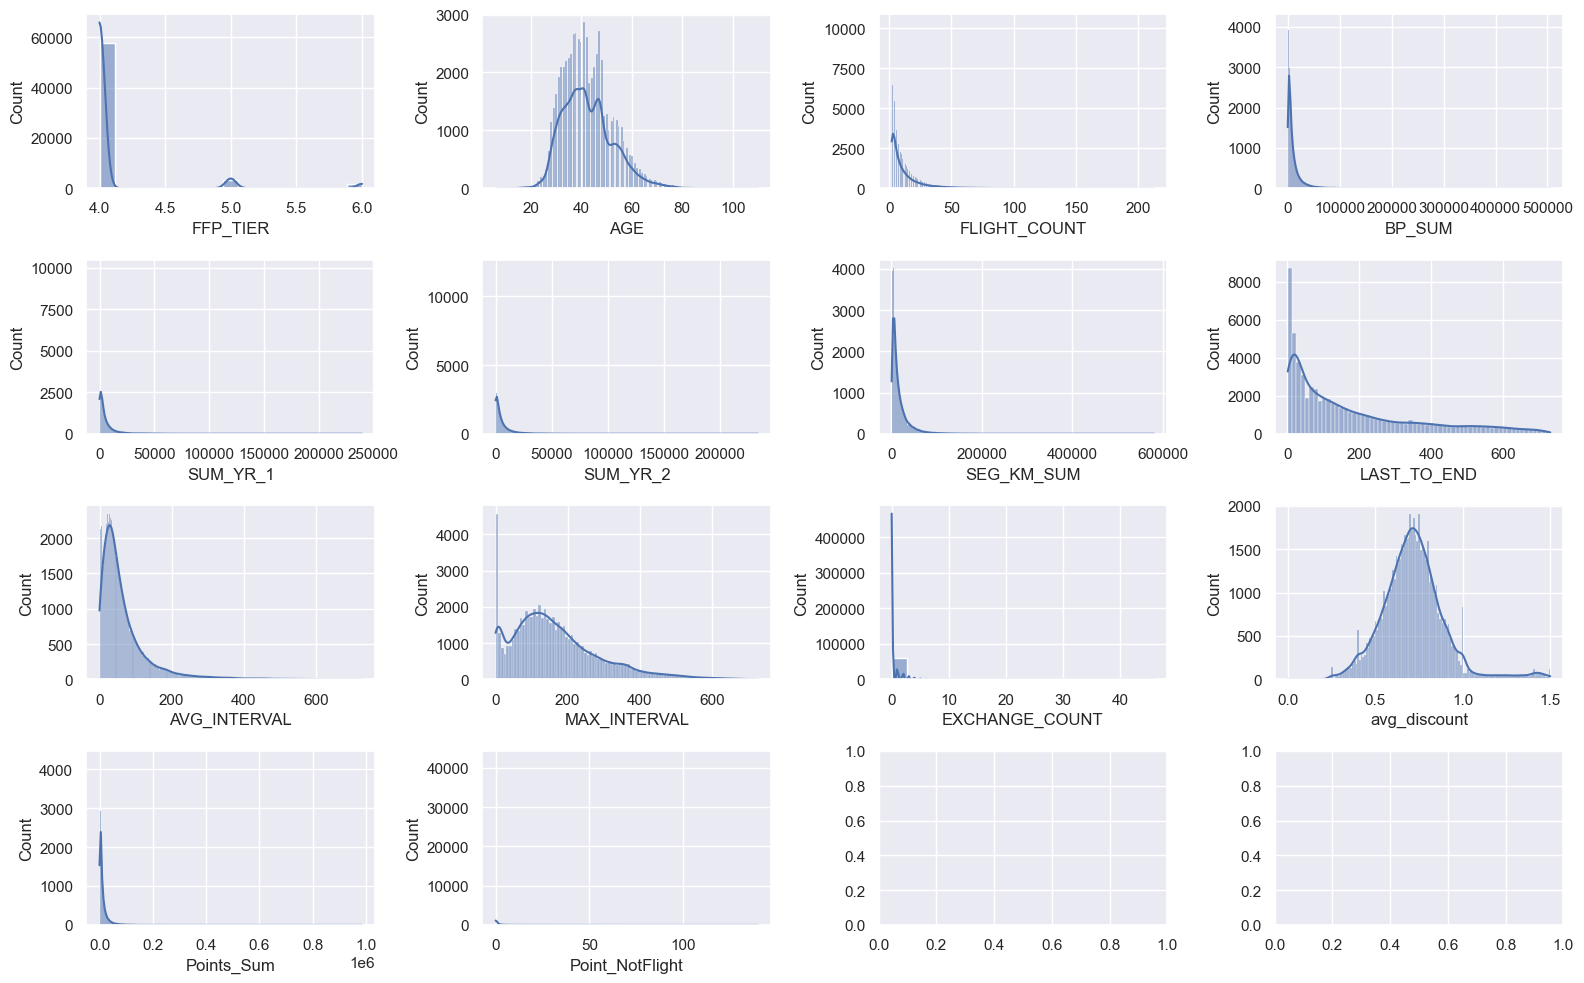

In [110]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(nums):
    sns.histplot(x=var, data=df, kde=True, ax=axs[i])

fig.tight_layout()

plt.show()

#### Melihat Distribusi Kolom Kategorikal

##### Gender

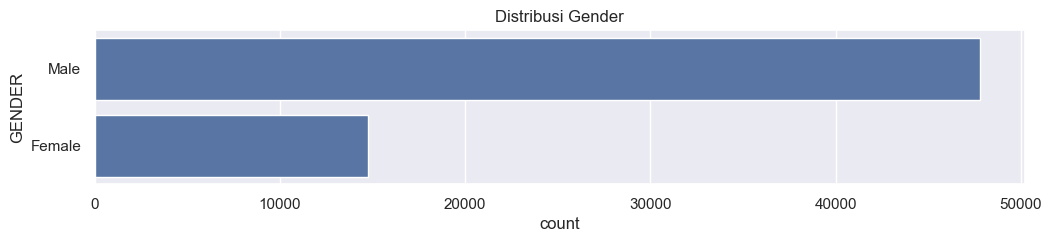

In [111]:
plt.figure(figsize=(12, 2))
sns.countplot(data=df, y='GENDER', order=df['GENDER'].value_counts().index)
plt.title('Distribusi Gender')
plt.show()

##### Kategorikal Top 20

Kolom kategorikal "WORK_CITY", "WORK_PROVINCE", dan "WORK_COUNTRY" memiliki jumlah unique value yang cukup banyak, maka dari hanya akan ditampilkan top 20 teratas saja

In [112]:
def plot_categorical(cat_column):
    top_n_values = df[cat_column].value_counts().nlargest(20).index
    
    # Membuat dataframe yang berisi hanya data dengan top 20 nilai unik
    df_filtered = df[df[cat_column].isin(top_n_values)]

    # Visualisasi data kategorikal yang telah difilter
    plt.figure(figsize=(15, 4))
    sns.countplot(data=df_filtered, x=cat_column)
    plt.title(f'Distribusi {cat_column} (Top 20)')
    plt.xticks(rotation=45)
    plt.show()

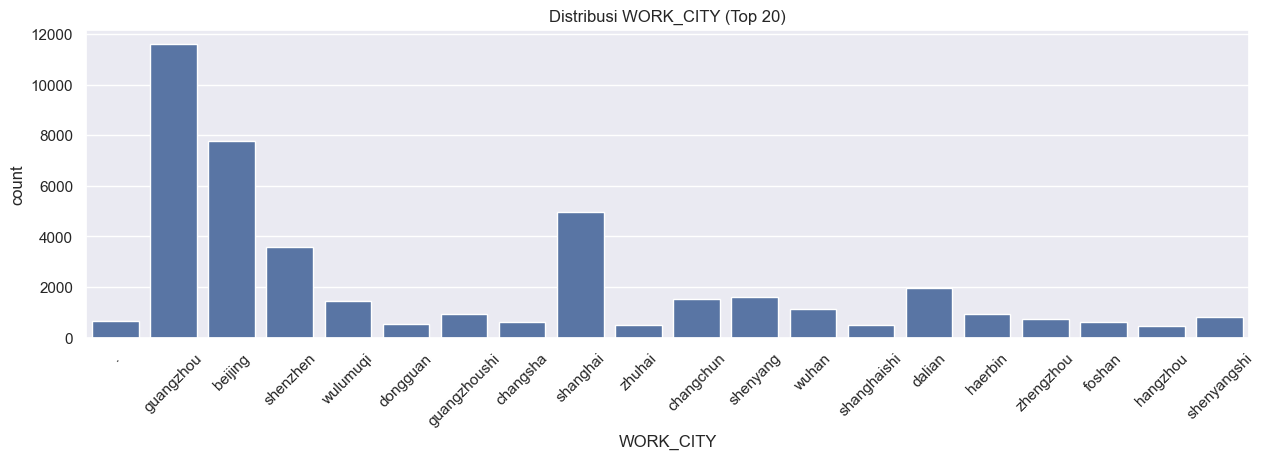

In [113]:
plot_categorical("WORK_CITY")

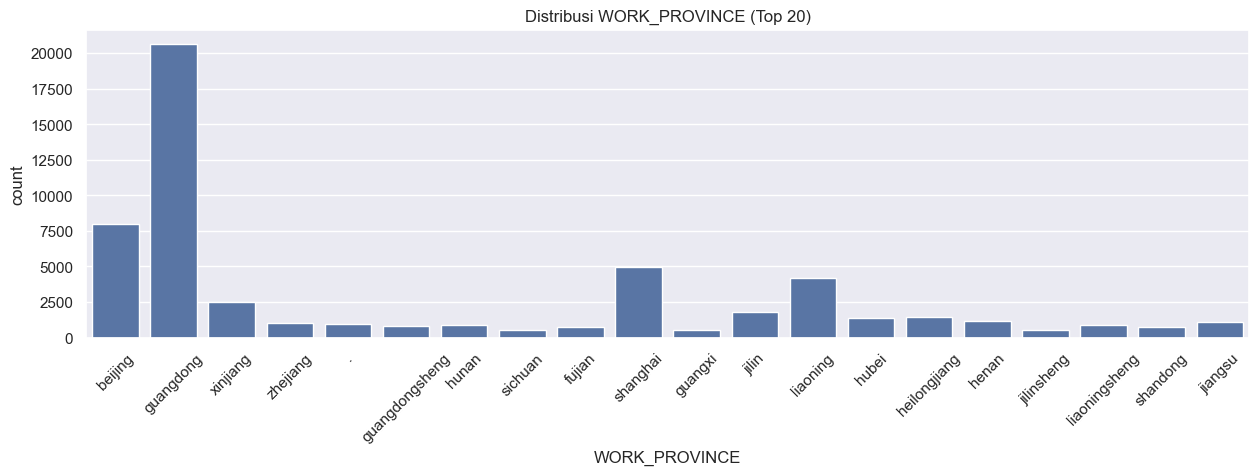

In [114]:
plot_categorical("WORK_PROVINCE")

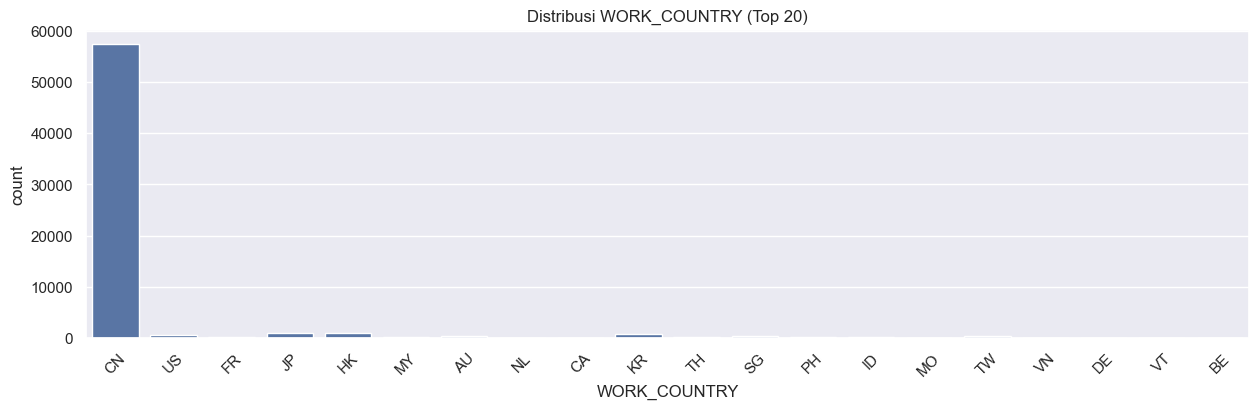

In [115]:
plot_categorical("WORK_COUNTRY")

#### Melihat Distribusi Kolom Datetime

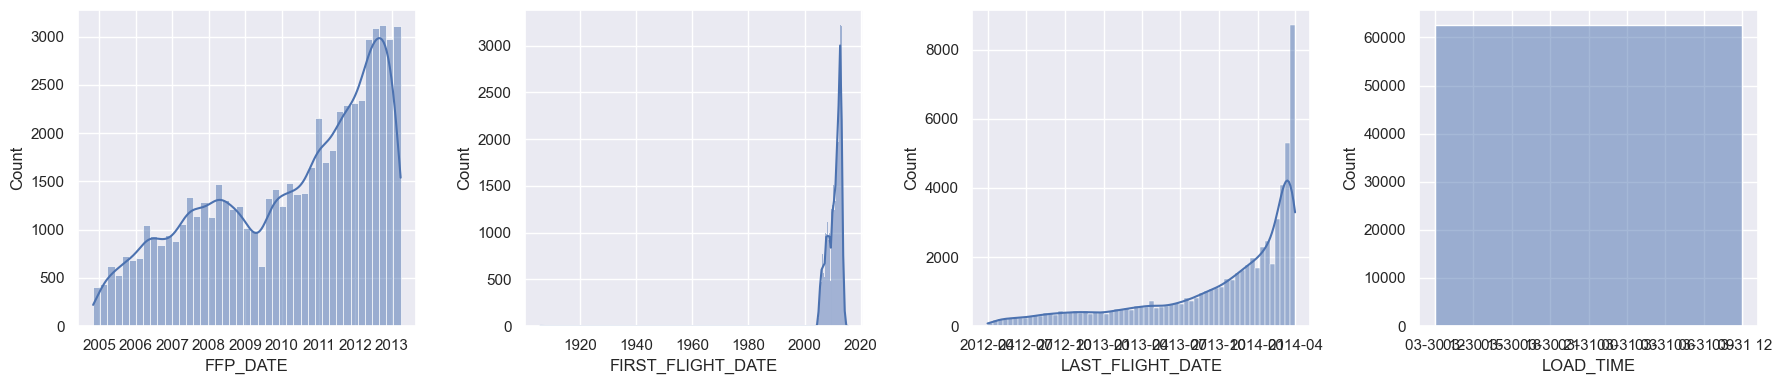

In [116]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))
axs = axs.flatten()

for i, var in enumerate(date):
    sns.histplot(x=var, data=df, kde=True, ax=axs[i])

fig.tight_layout()

plt.show()

Dapat terlihat dari grafik diatas bahwa terjadi kenaikan trend setiap tahunnya.

### Bagian C

#### Analisa Multivariate

<Axes: >

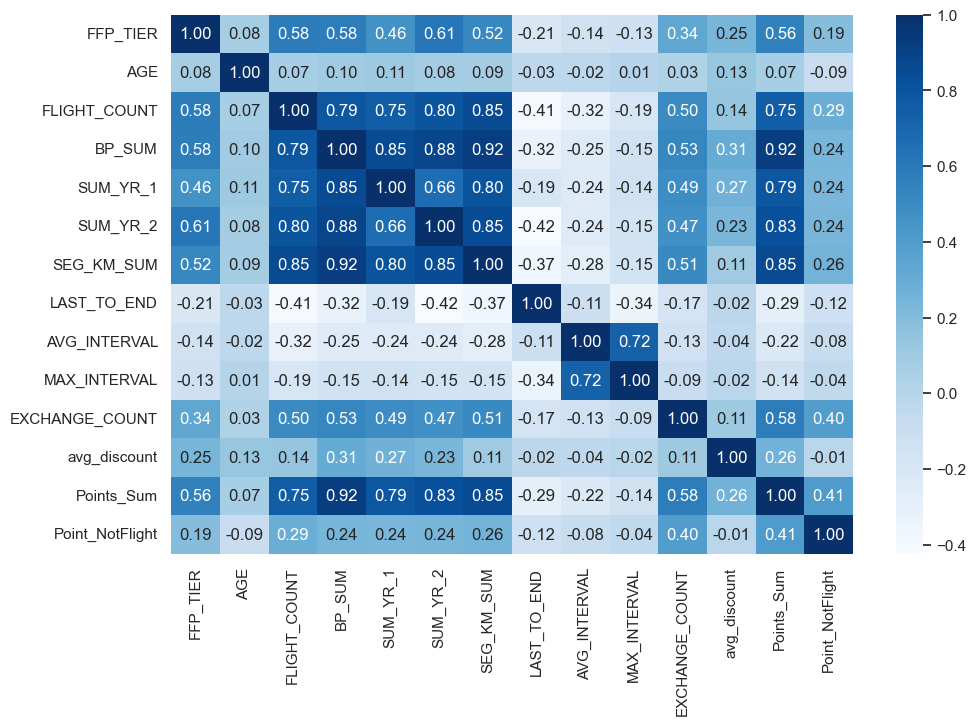

In [117]:
plt.figure(figsize=(11, 7))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

Terdapat beberapa fitur yang memiliki korelasi yang besar, maka untuk fitur-fitur yang memiliki nilai korelasi diatas 0.80 untuk bisa langsung dieliminasi salah satunya sehingga didapatkan 1 fitur yang tidak redundant. Untuk fitur-fitur yang memiliki nilai diatai 0.70 untuk bisa dilakukan pertimbangan apakah harus digunakan atau idak agar tidak terjadi multicol.

## Nomor 2 

### Bagian B

#### Preprocessing

##### Menghapus Outlier Pada Kolom Numerik

In [118]:
def remove_outliers_iqr(dataframe, column_name):
    # Calculate the IQR
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    filtered_dataframe = dataframe[(dataframe[column_name] >= lower_bound) & (
        dataframe[column_name] <= upper_bound)]

    return filtered_dataframe

In [119]:
print("Original DataFrame Shape:", df.shape)

df_filtered = df.copy()
for i in range(0, len(nums)):
    df_filtered = remove_outliers_iqr(df_filtered, nums[i])

print("Filtered DataFrame Shape:", df_filtered.shape)

Original DataFrame Shape: (62567, 23)
Filtered DataFrame Shape: (30640, 23)


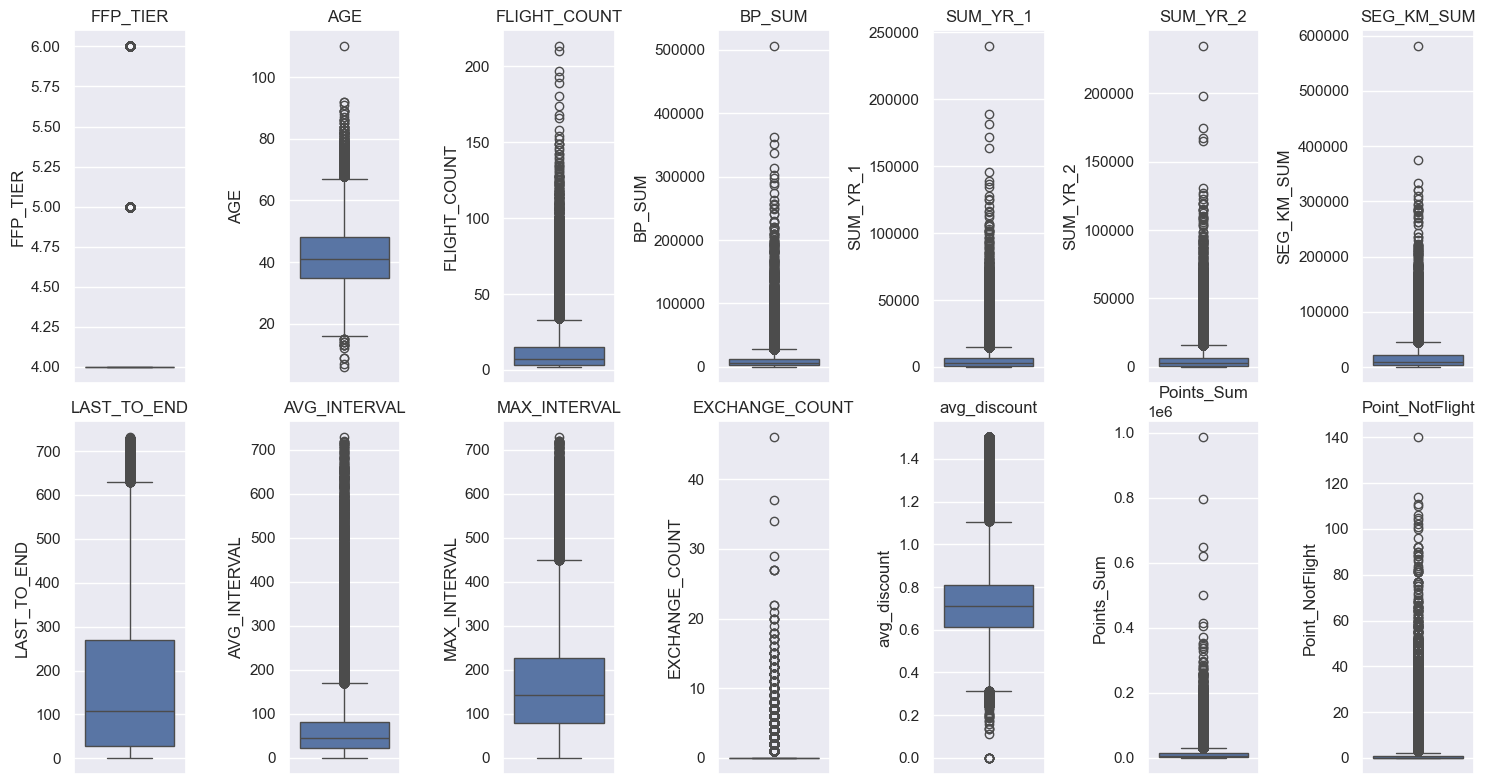

In [120]:
plt.figure(figsize=(15, 8))

for i in range(len(nums)):
    plt.subplot(2, len(nums)//2, i+1) 
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.title(nums[i])

plt.tight_layout()
plt.show()

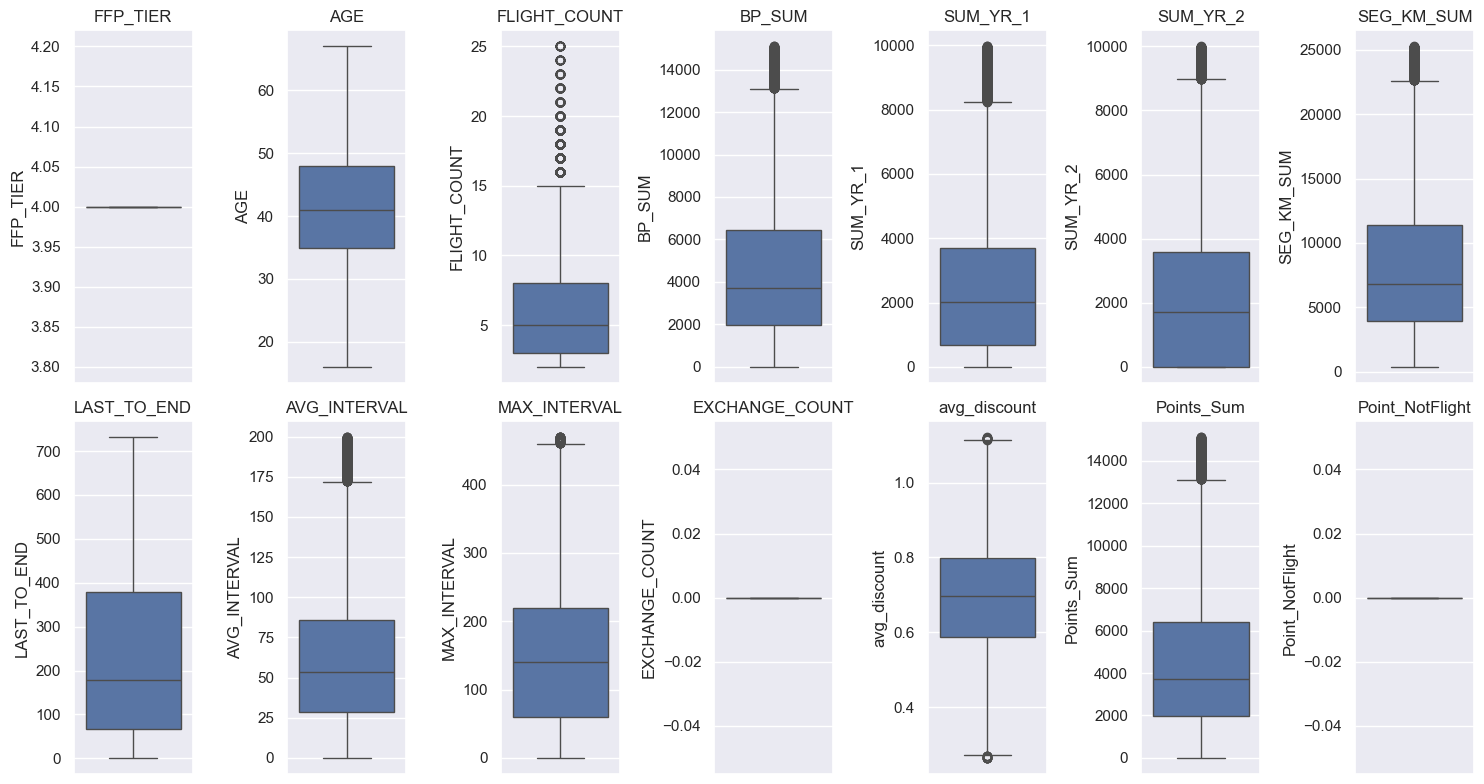

In [121]:
plt.figure(figsize=(15, 8))

for i in range(len(nums)):
    plt.subplot(2, len(nums)//2, i+1)
    sns.boxplot(y=df_filtered[nums[i]], orient='v')
    plt.title(nums[i])

plt.tight_layout()
plt.show()

#### Feature Engineering

##### Feature Encoding

Feature encoding akan dilakukan pada fitur kategorikal yaitu fitur 'Gender'agar fitur dapat direpresentasikan sebagai fitur numerik

In [122]:
# Membuat mapping dari kategori ke nilai numerik
gender_mapping = {'Male': 0, 'Female': 1}
df_filtered['GENDER'] = df_filtered['GENDER'].map(gender_mapping)

##### Recency

Kapan terakhir kali customer melakukan penerbangan (Dalam jumlah hari)

In [123]:
df_filtered['recency'] = (df_filtered['LOAD_TIME'] - df_filtered['LAST_FLIGHT_DATE']).dt.days

In [124]:
df_filtered['recency'].value_counts().reset_index()

,recency,count
0,3,213
1,0,199
2,4,198
3,1,194
4,11,188
...,...,...
725,724,3
726,728,2
727,454,1
728,729,1


##### Frequency

Frequency dapat dilihat dari kolom FLIGHT_COUNT

##### Monetary

In [125]:
df_filtered['monetary'] = df_filtered['SUM_YR_1'] + df_filtered['SUM_YR_2']

In [126]:
df_filtered['monetary'].value_counts().reset_index()

,monetary,count
0,2800.0,477
1,0.0,142
2,2773.0,114
3,1400.0,37
4,1920.0,35
...,...,...
10303,7764.0,1
10304,9224.0,1
10305,8496.0,1
10306,9028.0,1


##### Binning

In [127]:
# Menggunakan pd.qcut untuk membuat bins pada kolom 'AGE'
df_filtered['age_bin'] = pd.qcut(df_filtered['AGE'], q=5, labels=False)

# Menggunakan pd.qcut untuk membuat bins pada kolom 'avg_discount'
df_filtered['avg_discount_level'] = pd.qcut(df_filtered['avg_discount'], q=5, labels=False)

# Membuat bins untuk mengelompokan jumlah poin 
df_filtered['Points_Sum_level'] = pd.qcut(df_filtered['Points_Sum'], q=5, labels=False)

# Membuat bins untuk mengelompokan jumlah penukaran poin 
df_filtered['exchange_count_bin'] = pd.cut(df_filtered['EXCHANGE_COUNT'], bins=4, labels=False)

##### Average Distance

In [128]:
df_filtered['AVG_DISTANCE'] = df_filtered['SEG_KM_SUM'] / df_filtered['FLIGHT_COUNT']

In [129]:
df_filtered.shape

(30640, 30)

In [130]:
df_filtered.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,recency,monetary,age_bin,avg_discount_level,Points_Sum_level,exchange_count_bin,AVG_DISTANCE
11738,46939,2012-11-28,2013-01-12,0,4,haerbin,heilongjiang,CN,38.0,2014-03-31,13,15079,9264.0,8458.0,25075,2014-03-05,27,34.833333,216,0,0.775179,15079,0,26,17722.0,1,3,4,1,1928.846154
11817,10985,2004-12-02,2005-02-08,0,4,beijingshi,guangdong,CN,58.0,2014-03-31,4,11375,7900.0,0.0,23723,2012-11-29,489,80.333333,196,0,0.815327,11375,0,487,7900.0,4,3,4,1,5930.750000
12003,35368,2011-08-21,2011-08-21,0,4,shaoxing,zhejiang,CN,43.0,2014-03-31,13,13765,9363.0,6512.0,22522,2014-01-05,87,51.583333,244,0,0.848179,13765,0,85,15875.0,2,4,4,1,1732.461538
12164,7025,2012-12-02,2012-12-02,0,4,guangzhou,guangdong,CN,34.0,2014-03-31,14,14974,7875.0,8055.0,24785,2013-12-17,106,29.230769,129,0,0.763035,14974,0,104,15930.0,1,3,4,1,1770.357143
12169,1112,2007-03-14,2007-08-03,0,4,tongzhou,jiangsu,CN,38.0,2014-03-31,17,14924,6840.0,9902.0,23116,2014-01-23,69,36.437500,115,0,0.817760,14924,0,67,16742.0,1,3,4,1,1359.764706


#### Log Transformation

In [133]:
print(nums)

['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']


C:\Users\asus\AppData\Local\Temp\ipykernel_8772\1137906114.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])
C:\Users\asus\AppData\Local\Temp\ipykernel_8772\1137906114.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])
C:\Users\asus\AppData\Local\Temp\ipykernel_8772\1137906114.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])


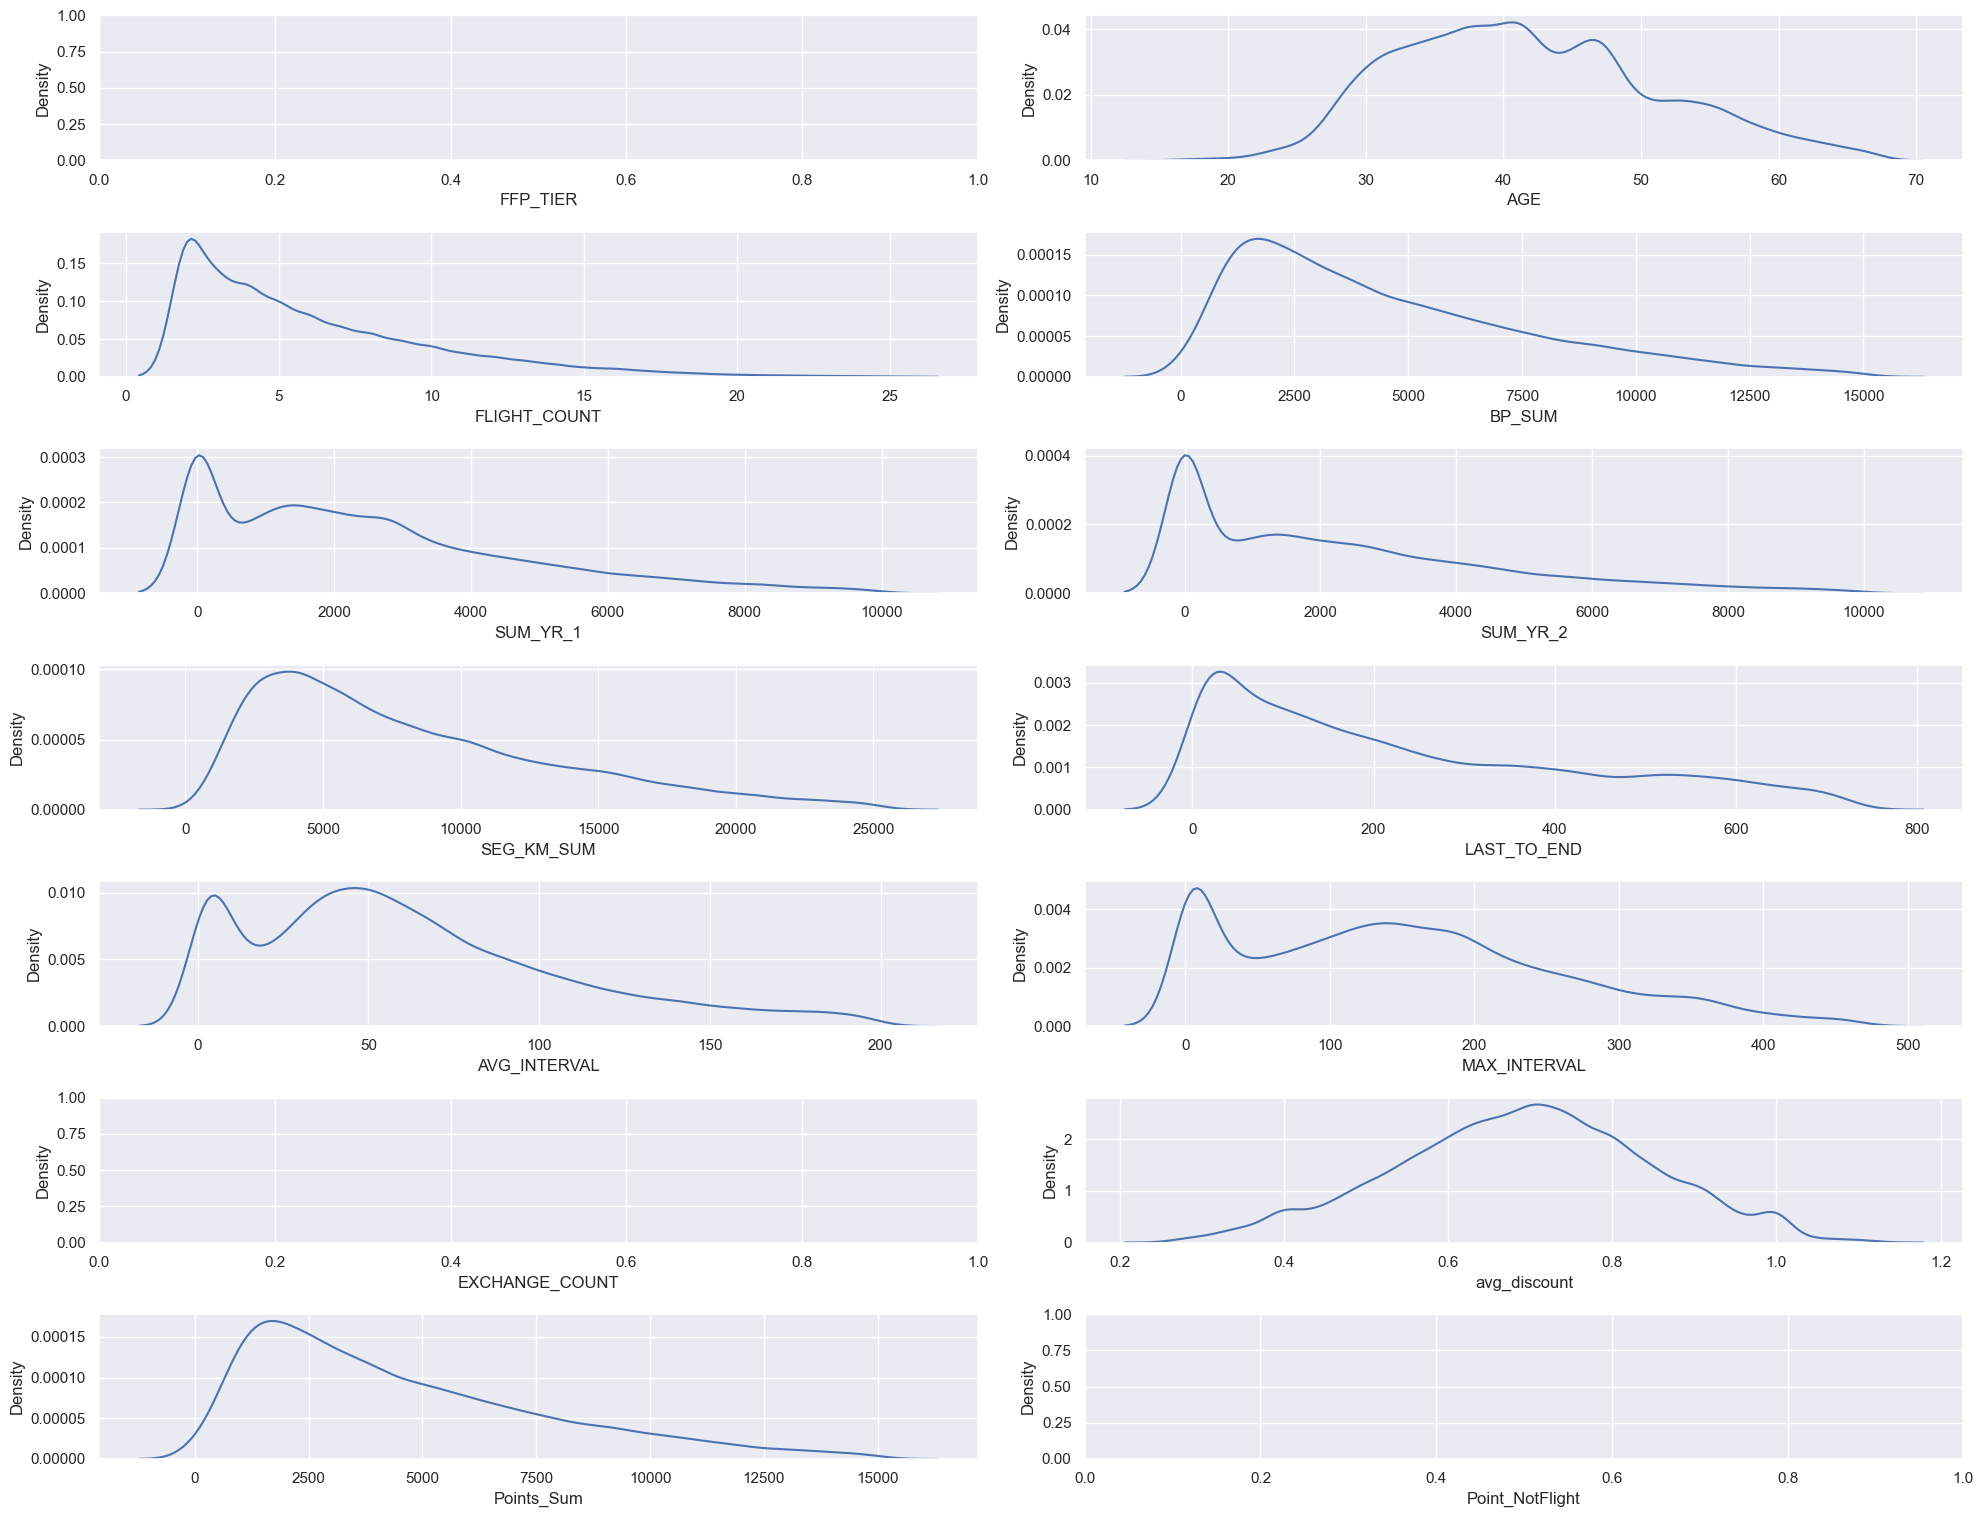

In [134]:
plt.figure(figsize=(20, 30))
for i in range(0, len(nums)):
    plt.subplot(len(nums), 2, i+1)
    sns.kdeplot(df_filtered[nums[i]])
    plt.tight_layout()

C:\Users\asus\AppData\Local\Temp\ipykernel_8772\512284426.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])
C:\Users\asus\AppData\Local\Temp\ipykernel_8772\512284426.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])


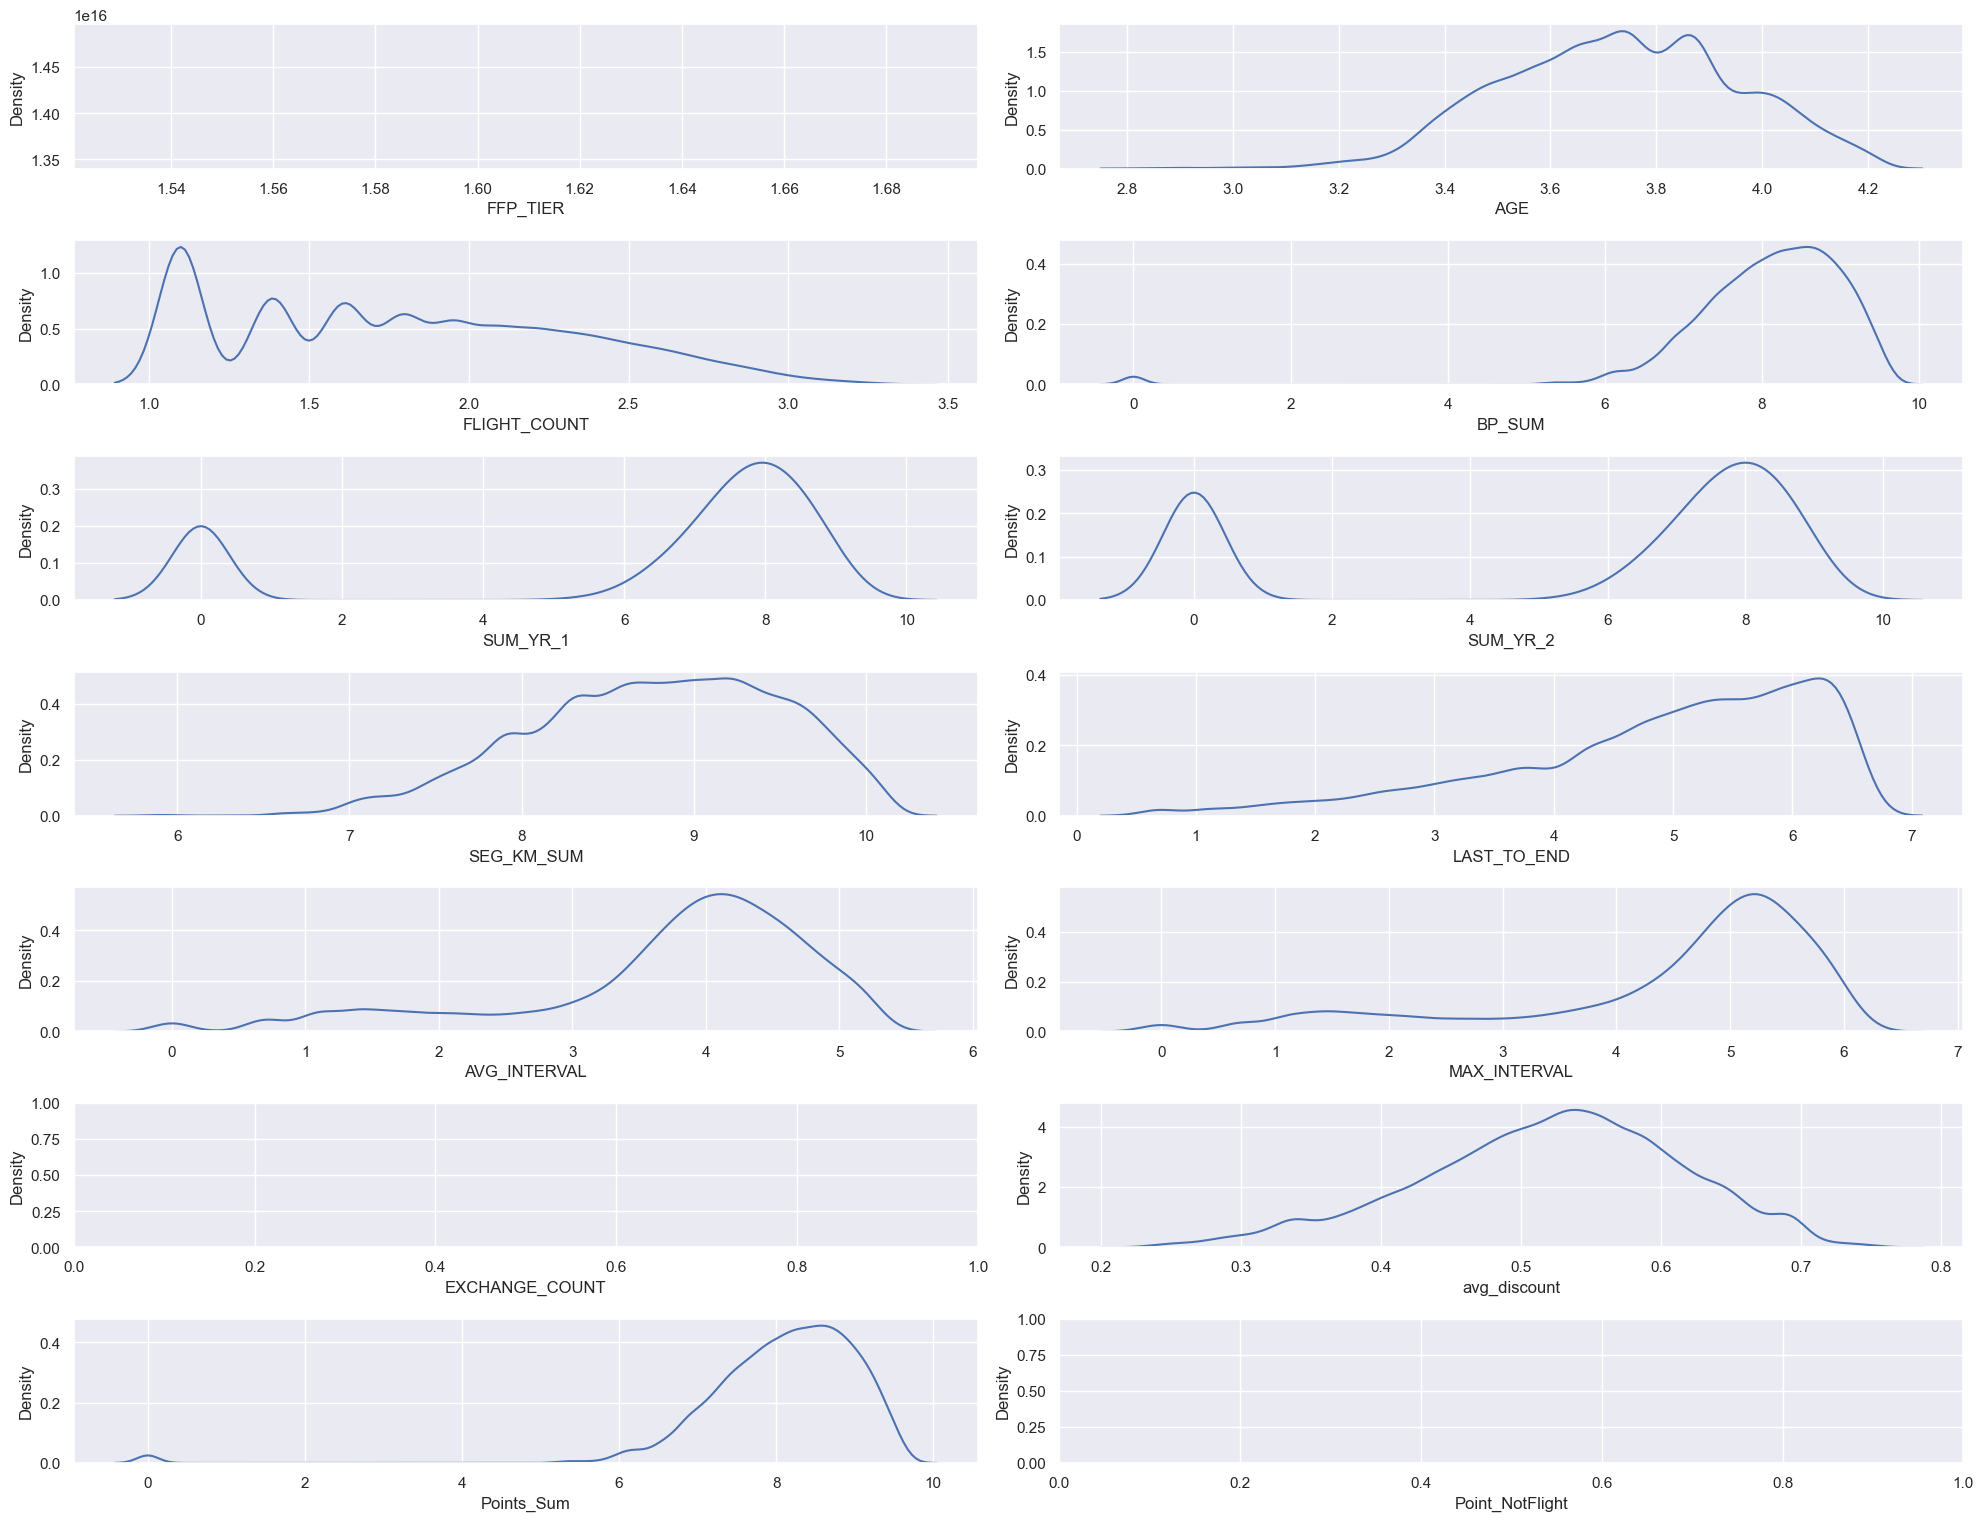

In [135]:
plt.figure(figsize=(20, 30))
for i in range(0, len(nums)):
    df_filtered[nums[i]] = np.log1p(df_filtered[nums[i]])

    plt.subplot(len(nums), 2, i+1)
    sns.kdeplot(df_filtered[nums[i]])
    plt.tight_layout()

### Bagian A

In [136]:
df_selected = df_filtered[['AGE', 'FLIGHT_COUNT', 'recency', 'monetary', 'AVG_DISTANCE']]
df_selected

,AGE,FLIGHT_COUNT,recency,monetary,AVG_DISTANCE
11738,3.663562,2.639057,26,17722.0,1928.846154
11817,4.077537,1.609438,487,7900.0,5930.750000
12003,3.784190,2.639057,85,15875.0,1732.461538
12164,3.555348,2.708050,104,15930.0,1770.357143
12169,3.663562,2.890372,67,16742.0,1359.764706
...,...,...,...,...,...
62964,3.713572,1.098612,414,830.0,184.000000
62965,3.555348,1.098612,416,830.0,184.000000
62966,3.637586,1.098612,410,830.0,184.000000
62975,3.663562,1.098612,119,910.0,184.000000


## Nomor 3

In [137]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

### Bagian A

In [138]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

In [139]:
df_scaled = pd.DataFrame(scaled_data, columns=df_selected.columns)

In [140]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

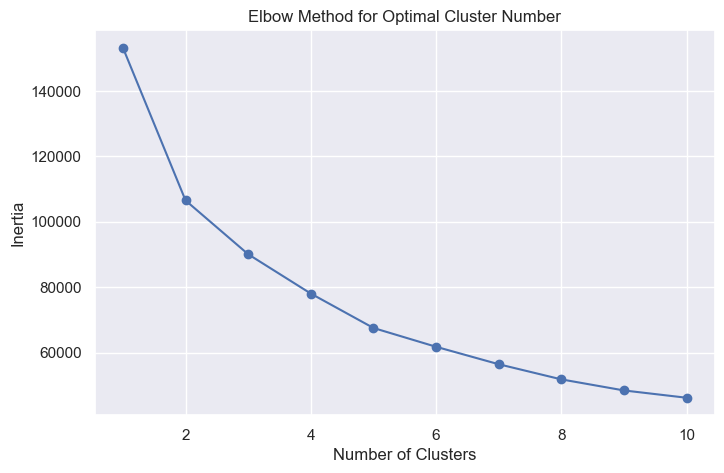

In [141]:
# Plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Bagian B

In [158]:
optimal_cluster_number = 2
kmeans = KMeans(n_clusters=optimal_cluster_number, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)

In [159]:
df_scaled['Cluster_Labels'] = labels
df_scaled

,AGE,FLIGHT_COUNT,recency,monetary,AVG_DISTANCE,Cluster_Labels
0,-0.307968,1.548150,-1.047336,4.010961,0.564436,0
1,1.579777,-0.354855,1.265591,0.970916,5.486383,1
2,0.242100,1.548150,-0.751321,3.439289,0.322902,0
3,-0.801426,1.675666,-0.655994,3.456312,0.369510,0
4,-0.307968,2.012644,-0.841631,3.707638,-0.135478,0
...,...,...,...,...,...,...
30635,-0.079918,-1.298994,0.899336,-1.217348,-1.581553,1
30636,-0.801426,-1.298994,0.909371,-1.217348,-1.581553,1
30637,-0.426417,-1.298994,0.879267,-1.217348,-1.581553,1
30638,-0.307968,-1.298994,-0.580736,-1.192587,-1.581553,1


In [160]:
df_scaled.to_csv('../dataset/scaled.csv', index=False)

In [161]:
df_result = pd.read_csv('../dataset/selected.csv')
df_result['Cluster_Labels'] = labels
df_result

,AGE,FLIGHT_COUNT,recency,monetary,AVG_DISTANCE,Cluster_Labels
0,38.0,13,26,17722.0,1928.846154,0
1,58.0,4,487,7900.0,5930.750000,1
2,43.0,13,85,15875.0,1732.461538,0
3,34.0,14,104,15930.0,1770.357143,0
4,38.0,17,67,16742.0,1359.764706,0
...,...,...,...,...,...,...
30635,40.0,2,414,830.0,184.000000,1
30636,34.0,2,416,830.0,184.000000,1
30637,37.0,2,410,830.0,184.000000,1
30638,38.0,2,119,910.0,184.000000,1


In [148]:
df_result.to_csv('../dataset/result.csv', index=False)

### Bagian C

#### Silhoutte Score

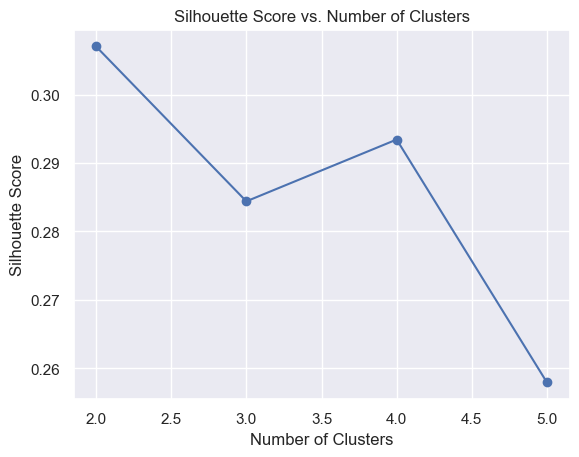

In [155]:
from sklearn.metrics import silhouette_score

cluster_range = range(2, 6)
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### PCA

In [150]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_scaled)

In [151]:
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

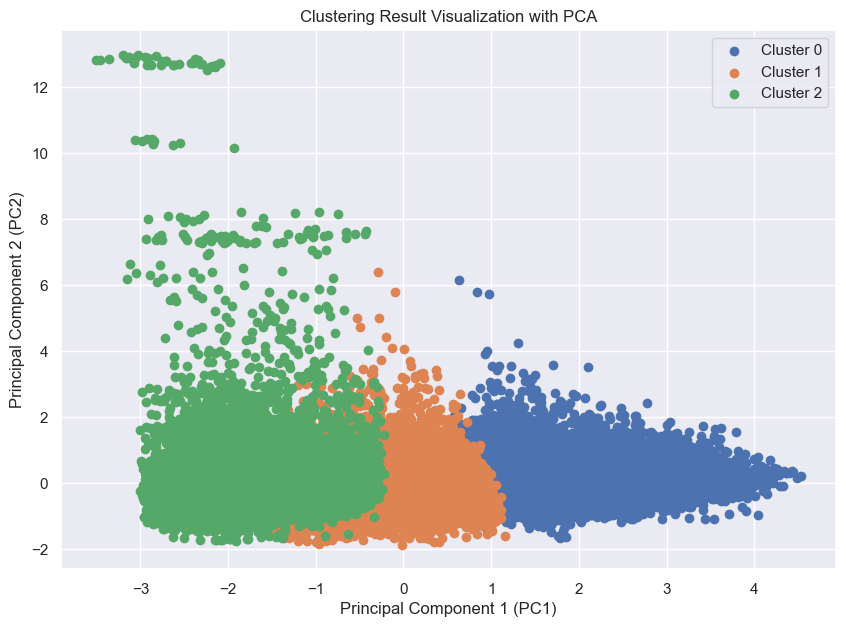

In [152]:
plt.figure(figsize=(10, 7))
for cluster in range(optimal_cluster_number):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                label=f'Cluster {cluster}')

plt.title('Clustering Result Visualization with PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

## Nomor 4

### Bagian A

In [49]:
# Ini mmas ramlan

### Bagian B

### Bagian C